# Project : Downloading XKCD Images from Web

## About XKCD

XKCD is a webcomic created in 2005 by American author **Randall Patrick Munroe**.

The comic's tagline describes it as __*a webcomic of romance, sarcasm, math, and language*__.

### Importing Libraries

The **Python Package Index**, abbreviated as PyPI  is the official third-party software repository for Python.
>Requests is an elegant and simple HTTP library for Python.  
>It allows you sending http request extremely easily.

>Beautiful Soup is a python package which allows us to pull data out of HTML and XML documents.  
>It provides simple methods for navigating, searching, and modifying a parse tree in HTML, XML files.  
>It transforms a complex HTML document into a tree of Python objects.  
>It also automatically converts the document to Unicode, so you don't have to think about encodings.

>Python OS module provides the facility to establish the interaction between the user and the operating system.  
>It offers many useful OS functions that are used to perform OS-based tasks and get related information about operating system.

In [1]:
import requests
import bs4
import os
import platform

### Checking Version of Libraries

In [2]:
print(requests.__version__)
print(bs4.__version__)
print(platform.platform())

2.28.2
4.12.2
Windows-10-10.0.19041-SP0


### Defining URL and Creating a separate directory for downloading XKCD images

In [3]:
url="http://xkcd.com"
os.makedirs('xkcd',exist_ok=True)

### Sending a request to the server, checking for status and parsing html

In [4]:
res=requests.get(url)
res.raise_for_status()
soup=bs4.BeautifulSoup(res.text,"html.parser")

### Creating a while loop for downloading images from xkcd.com and write to xkcd folder

In [5]:
#while not url.endswith("#"):
while not url.endswith("2762/"):
    res=requests.get(url)
    res.raise_for_status()
    soup=bs4.BeautifulSoup(res.text)
    #find the url of the comic image
    comicelem=soup.select('#comic img')
    if comicelem==[]:
        print("could not find comic image")
    else:
        comicurl=comicelem[0].get('src')
        print("downloading the image %s"%(comicurl))
        res2=requests.get('https:'+comicurl)
        res2.raise_for_status()
        #Save the image to the xkcd folder
        print("Saving file to this directory:  "+os.path.join('xkcd',os.path.basename(comicurl)))
        imagefile=open(os.path.join('xkcd',os.path.basename(comicurl)),'wb')
        for chunk in res2.iter_content(10000):
            imagefile.write(chunk)
        imagefile.close()
    #Get the previous button's url
    prevlink=soup.select("a[rel='prev']")
    url='http://xkcd.com'+prevlink[0].get('href')
    print("previous link:  "+url)
print("Done")

downloading the image //imgs.xkcd.com/comics/recipe_relativity.png
Saving file to this directory:  xkcd\recipe_relativity.png
previous link:  http://xkcd.com/2766/
downloading the image //imgs.xkcd.com/comics/helium_reserve.png
Saving file to this directory:  xkcd\helium_reserve.png
previous link:  http://xkcd.com/2765/
downloading the image //imgs.xkcd.com/comics/escape_speed.png
Saving file to this directory:  xkcd\escape_speed.png
previous link:  http://xkcd.com/2764/
downloading the image //imgs.xkcd.com/comics/cosmological_nostalgia_content.png
Saving file to this directory:  xkcd\cosmological_nostalgia_content.png
previous link:  http://xkcd.com/2763/
downloading the image //imgs.xkcd.com/comics/linguistics_gossip.png
Saving file to this directory:  xkcd\linguistics_gossip.png
previous link:  http://xkcd.com/2762/
Done


### Importing downloaded images for viewing them

In [6]:
images=[]
for folder, _, filenames in os.walk(os.path.join(os.getcwd(),"xkcd")):
    for filename in filenames:
        images.append(filename)
images=images[::-1]

### Importing visualization library

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Creating a for loop for showing images from xkcd folder

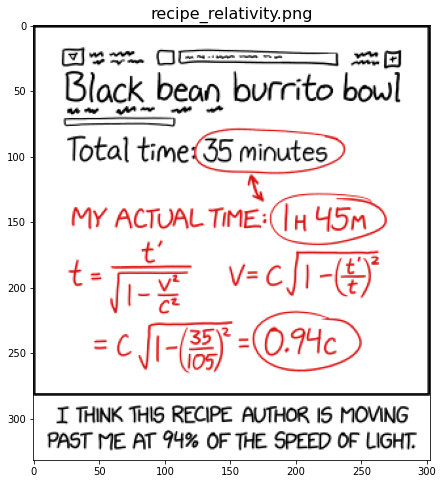

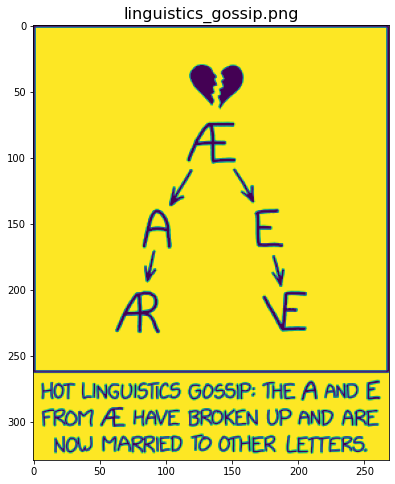

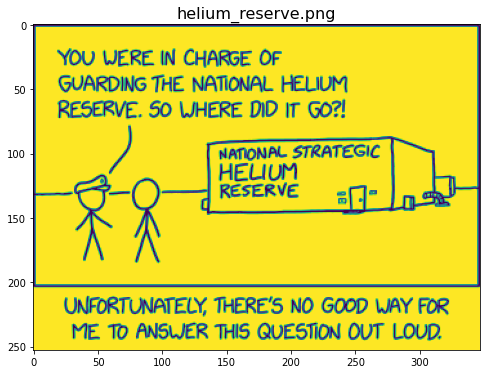

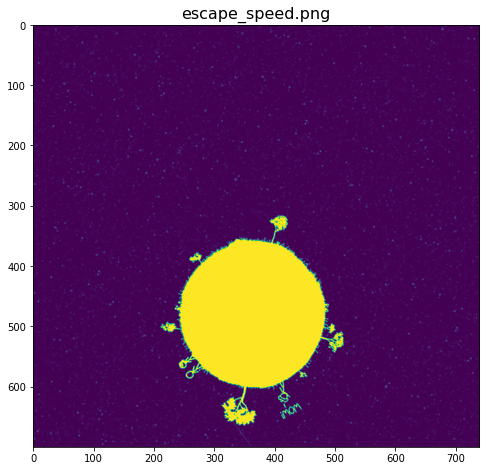

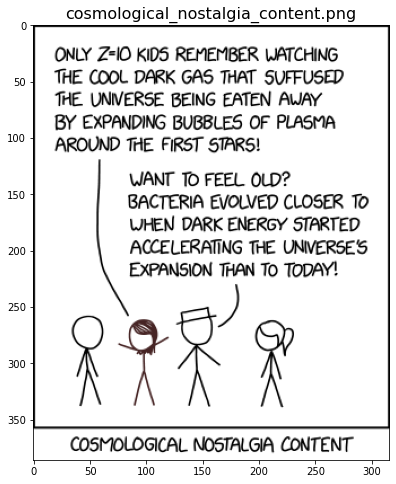

In [8]:
for img in images:
    image1=mpimg.imread(".\\xkcd\\"+img)
    plt.figure(figsize=(8,8))
    plt.title(img,fontsize=16)
    plt.imshow(image1)